In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Import the data

In [57]:
df = pd.read_csv('../datasets/train.csv')

In [58]:
df.sample(5)

id       keyword            location  \
3120   4480  electrocuted  Newcastle, England   
6854   9823        trauma         Houston, TX   
2313   3322    demolished         ???????????   
7481  10702         wreck                 NaN   
1886   2709       crushed                 NaN   

                                                   text  target  
3120  Also my iPhone charger is broken and I just el...       0  
6854  Photo: lavenderpoetrycafe: The Forgotten Histo...       1  
2313  It was finally demolished in the spring of 201...       0  
7481  the sunset boys wreck my bed   original 1979 u...       1  
1886                Crushed it! https://t.co/EWnUnp8Hdo       0

In [59]:
df.shape

(7613, 5)

There are 7613 datapoints present in the dataset

**Descriptive Statistics of the dataset**

In [60]:
df.describe(include = 'all')

id     keyword location  \
count    7613.000000        7552     5080   
unique           NaN         221     3341   
top              NaN  fatalities      USA   
freq             NaN          45      104   
mean     5441.934848         NaN      NaN   
std      3137.116090         NaN      NaN   
min         1.000000         NaN      NaN   
25%      2734.000000         NaN      NaN   
50%      5408.000000         NaN      NaN   
75%      8146.000000         NaN      NaN   
max     10873.000000         NaN      NaN   

                                                     text      target  
count                                                7613  7613.00000  
unique                                               7503         NaN  
top     11-Year-Old Boy Charged With Manslaughter of T...         NaN  
freq                                                   10         NaN  
mean                                                  NaN     0.42966  
std                                                   NaN     0.49506  
min                                                   NaN     0.00000  
25%                                                   NaN     0.00000  
50%                                                   NaN     0.00000  
75%                                                   NaN     1.00000  
max                                                   NaN     1.00000

**A countplot for the number of disastrous and non disastrous tweets**

0 --> Not disastrous tweet


1 --> Disastrous tweet

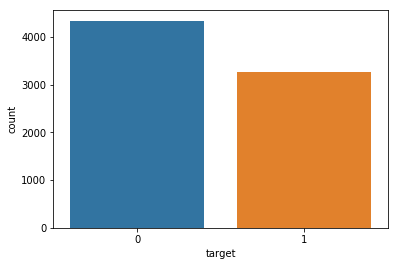

In [61]:
sns.countplot(df.target)

This is an unbalanced datasets. The dataset contains more of non disastrous messages

**The data frame displaying the number of disastrous and non disastrous tweet**

In [97]:
df.target.value_counts().to_frame('count')

count
0   4342
1   3271

Disastrous tweets --> 3271


Non disastrous tweets --> 4342

**The number of missing values in each columns**

In [115]:
df.isnull().sum().to_frame(name = 'number of null values')

number of null values
id                            0
keyword                      61
location                   2533
text                          0
target                        0

### The Locations and Keywords with most disastrous tweets

In [64]:
disastrous_tweets = df[df.target == 1]

In [65]:
disastrous_tweets.shape

(3271, 5)

**replace the missing values with NONE so that it can be visualized in the visualization analysis**

In [67]:
#fill the missing values with NONE

disastrous_tweets.fillna('NONE', inplace=True)

/home/komolehin/.local/lib/python3.6/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### The location with most disastrous tweets

In [68]:
# Needed to rename this location because it was raising an exception when for the countplot

location_of_disastrous_tweets = [i.replace(i, 'mississippi') if i == 'M!$$!$$!PP!' else i for i in disastrous_tweets['location']]

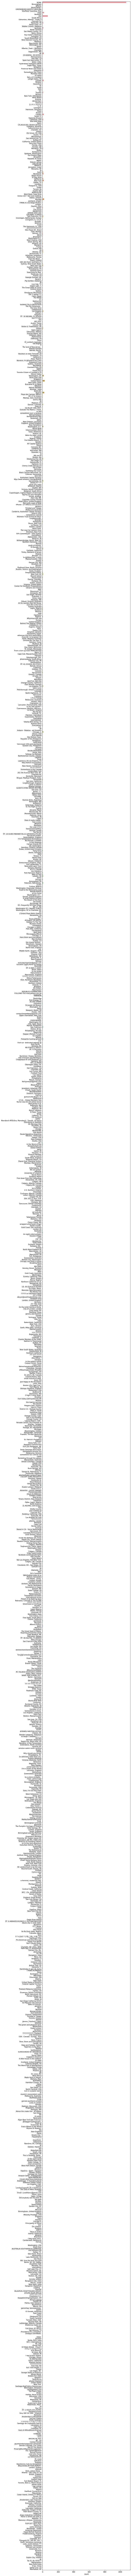

In [69]:
plt.figure(figsize=(10,300))
sns.countplot(y = location_of_disastrous_tweets)

1. For most disastrous tweets, location is null value


2. For the non null locations, most disastrous tweets are from regions in the united states

### The frequency of the keywords with most disastrous tweets

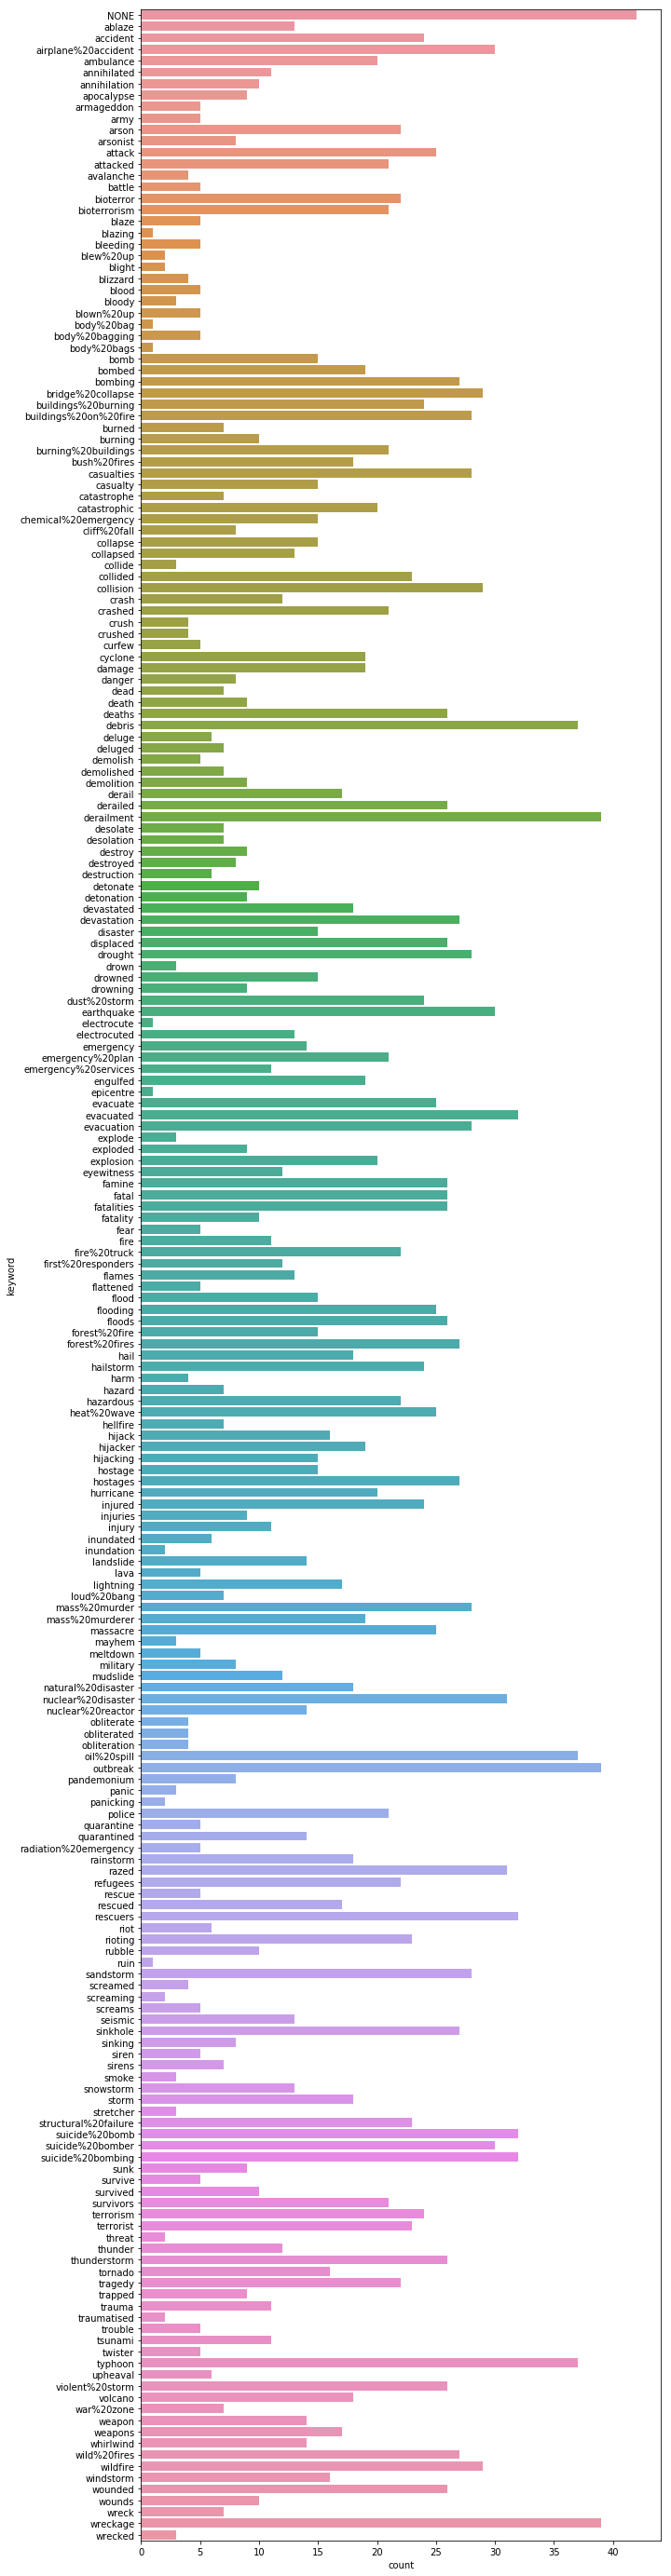

In [29]:
plt.figure(figsize=(10,50))
sns.countplot(y = disastrous_tweets.keyword)

### The keywords and locations of non disastrous tweets

In [70]:
non_disastrous_tweets = df[df.target == 0]

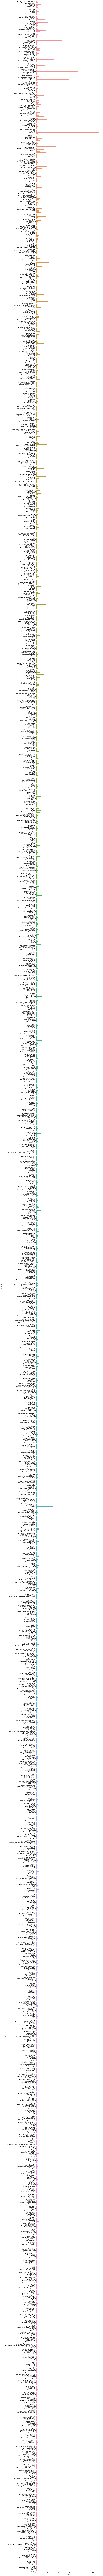

In [80]:
plt.figure(figsize=(10,400))
sns.countplot(y = non_disastrous_tweets.location)

For none disastrous tweets, most of the tweets are from New York.

From the analysis above, the location for most tweets are null values, however, for the recorded location of tweets, most of the tweets are from America. Below is a dataframe to illustrate this

In [82]:
df.location.value_counts().to_frame()

location
USA                     104
New York                 71
United States            50
London                   45
Canada                   29
...                     ...
kenya                     1
Scottsdale, AZ            1
shoujo hell               1
CORNFIELDS                1
Helsinki, Finland         1

[3341 rows x 1 columns]